In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/lavle/Downloads/Fraud.csv')

In [3]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
data.step.nunique()

743

In [5]:
data.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [6]:
data.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
data.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [8]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
fin_data = data.drop(['nameOrig','nameDest','step'], axis = 1)

In [13]:
fin_data

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [14]:
fin_data.dtypes

type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [15]:
data_corr = fin_data.drop('type', axis = 1)

In [16]:
data_corr1 = data_corr.corr()

<Axes: >

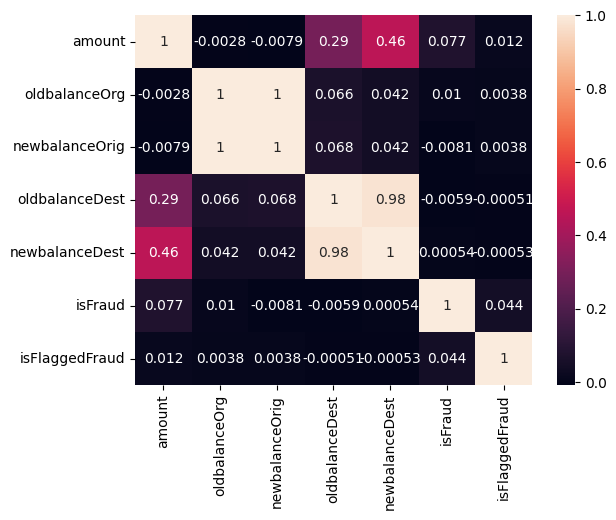

In [17]:
sns.heatmap(data= data_corr1, xticklabels= data_corr1.columns, yticklabels= data_corr1.columns, annot= True)

In [18]:
fin_data = fin_data.drop(['oldbalanceOrg','oldbalanceDest'], axis = 1)

In [19]:
fin_data

,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,160296.36,0.00,0,0
1,PAYMENT,1864.28,19384.72,0.00,0,0
2,TRANSFER,181.00,0.00,0.00,1,0
3,CASH_OUT,181.00,0.00,0.00,1,0
4,PAYMENT,11668.14,29885.86,0.00,0,0
...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,0.00,6379898.11,1,0
6362618,TRANSFER,850002.52,0.00,0.00,1,0


<Axes: >

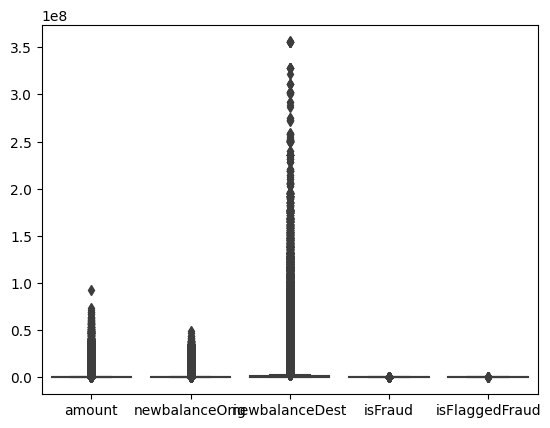

In [20]:
sns.boxplot(data = fin_data)

In [21]:
from scipy import stats

In [22]:
z_scores = stats.zscore(fin_data.newbalanceDest)

In [23]:
abs_z_scores = np.abs(z_scores)

In [24]:
indices_of_outliers = np.where(abs_z_scores > 3)

In [25]:
indices_of_outliers

(array([     84,      88,      89, ..., 6362134, 6362256, 6362507],
       dtype=int64),)

In [26]:
outliers = list(indices_of_outliers[0])

In [27]:
outliers

[84,
 88,
 89,
 94,
 96,
 113,
 156,
 171,
 177,
 289,
 358,
 359,
 362,
 375,
 376,
 432,
 463,
 557,
 602,
 616,
 618,
 628,
 634,
 636,
 656,
 688,
 798,
 800,
 812,
 873,
 880,
 895,
 973,
 1084,
 1153,
 1207,
 1296,
 1324,
 1403,
 1616,
 1731,
 1783,
 1785,
 1787,
 1818,
 1832,
 1859,
 1984,
 2144,
 2164,
 2186,
 2659,
 2679,
 2702,
 2832,
 2921,
 2927,
 2948,
 3314,
 3341,
 3606,
 3672,
 3868,
 3920,
 4002,
 4020,
 4155,
 4232,
 4325,
 4474,
 4480,
 4489,
 4492,
 4506,
 4512,
 4519,
 4535,
 4554,
 4601,
 4604,
 4606,
 4676,
 4682,
 4686,
 4688,
 4739,
 4741,
 4745,
 4860,
 4889,
 4922,
 4927,
 4939,
 4946,
 4953,
 4968,
 4973,
 4979,
 5010,
 5013,
 5070,
 5099,
 5124,
 5162,
 5163,
 5165,
 5166,
 5167,
 5626,
 5629,
 5670,
 5675,
 5677,
 5682,
 5695,
 5757,
 5774,
 5786,
 5787,
 5788,
 5792,
 5878,
 5883,
 5991,
 6005,
 6011,
 6014,
 6017,
 6018,
 6027,
 6069,
 6117,
 6148,
 6149,
 6195,
 6196,
 6211,
 6341,
 6379,
 6386,
 6457,
 6467,
 6468,
 6511,
 6627,
 6629,
 6651,
 6662,
 6

In [28]:
fin_data = fin_data.drop(outliers,axis =0)

<Axes: >

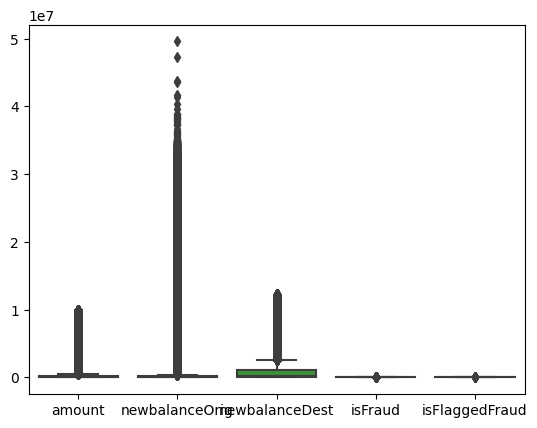

In [29]:
sns.boxplot(fin_data)

In [30]:
z_scores1 = stats.zscore(fin_data.newbalanceOrig)

In [31]:
abs_z_scores1 = np.abs(z_scores1)

In [32]:
indices_of_outliers1 = np.where(abs_z_scores1 > 3)

In [33]:
indices_of_outliers1

(array([    636,     637,    1290, ..., 6287410, 6287412, 6287414],
       dtype=int64),)

In [34]:
outliers1 = list(indices_of_outliers1[0])

In [35]:
outliers1

[636,
 637,
 1290,
 1291,
 1292,
 1293,
 1294,
 2893,
 2894,
 2895,
 2896,
 2897,
 2898,
 2899,
 3599,
 3600,
 3601,
 3602,
 3603,
 3604,
 3605,
 3606,
 3607,
 3608,
 3609,
 3610,
 3611,
 3612,
 3613,
 3614,
 3615,
 4440,
 4441,
 4442,
 4443,
 4444,
 4445,
 4446,
 4447,
 4448,
 4449,
 4450,
 4859,
 4860,
 4861,
 4862,
 4863,
 4864,
 4865,
 4866,
 4867,
 4868,
 4869,
 4870,
 4871,
 4872,
 4873,
 4874,
 4875,
 4876,
 4877,
 4878,
 4879,
 4880,
 6533,
 6534,
 6535,
 6536,
 6537,
 6538,
 6539,
 6540,
 6541,
 6542,
 6543,
 6964,
 6965,
 6966,
 6967,
 6968,
 6969,
 6970,
 7756,
 7757,
 7758,
 8409,
 8410,
 8411,
 8412,
 8413,
 8414,
 8415,
 11412,
 11413,
 11414,
 11415,
 11416,
 11417,
 11418,
 11419,
 11420,
 11421,
 12136,
 12137,
 12138,
 12139,
 12140,
 12141,
 16010,
 16011,
 16012,
 16013,
 16014,
 16166,
 16167,
 16168,
 16169,
 16170,
 16171,
 16172,
 16173,
 16174,
 16175,
 16176,
 16177,
 16178,
 16179,
 17146,
 17147,
 17148,
 17149,
 17150,
 17151,
 17152,
 17153,
 17154,
 17155

In [36]:
fin_data = fin_data.drop(index= outliers1, errors= 'ignore')

In [37]:
type = pd.get_dummies(fin_data.type, dtype= int)

In [38]:
fin_data = fin_data.drop('type', axis = 1)

In [39]:
fin_data = pd.concat([type, fin_data], axis = 1)

In [40]:
fin_data

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
0,0,0,0,1,0,9839.64,160296.36,0.00,0,0
1,0,0,0,1,0,1864.28,19384.72,0.00,0,0
2,0,0,0,0,1,181.00,0.00,0.00,1,0
3,0,1,0,0,0,181.00,0.00,0.00,1,0
4,0,0,0,1,0,11668.14,29885.86,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
6362615,0,1,0,0,0,339682.13,0.00,339682.13,1,0
6362616,0,0,0,0,1,6311409.28,0.00,0.00,1,0
6362617,0,1,0,0,0,6311409.28,0.00,6379898.11,1,0
6362618,0,0,0,0,1,850002.52,0.00,0.00,1,0


In [41]:
fin_data.isnull().sum()

CASH_IN           0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
amount            0
newbalanceOrig    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [42]:
X = fin_data.drop('isFraud', axis = 1)
y = fin_data.iloc[:, 8]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 1)

In [46]:
y_train

1838317    0
5544530    0
2369773    0
2233132    0
3834166    0
          ..
5218193    0
510192     0
4072302    0
4858722    0
4477346    0
Name: isFraud, Length: 4294676, dtype: int64

In [48]:
y_train.reset_index(drop= True, inplace= True)
X_train.reset_index(drop= True, inplace= True)
y_test.reset_index(drop= True, inplace= True)
X_test.reset_index(drop= True, inplace= True)

In [49]:
X_train

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud
0,0,0,0,1,0,14286.58,0.00,0.00,0
1,0,0,0,0,1,448359.71,0.00,3976048.82,0
2,0,0,0,0,1,578733.48,0.00,2304336.26,0
3,1,0,0,0,0,217235.83,5489044.97,469718.01,0
4,0,0,0,1,0,8829.03,108860.97,0.00,0
...,...,...,...,...,...,...,...,...,...
4294671,0,0,0,1,0,5413.31,13399.69,0.00,0
4294672,1,0,0,0,0,65379.48,115410.48,0.00,0
4294673,0,0,0,1,0,5463.40,2563.60,0.00,0
4294674,1,0,0,0,0,115588.69,354609.69,82869.46,0


In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
ss = StandardScaler()

In [57]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [58]:
X_train = pd.DataFrame(X_train, columns= ['CASH_IN','CASH_OUT',	'DEBIT','PAYMENT','TRANSFER','amount','newbalanceOrig','newbalanceDest','isFlaggedFraud'])
X_test = pd.DataFrame(X_test, columns= ['CASH_IN','CASH_OUT',	'DEBIT','PAYMENT','TRANSFER','amount','newbalanceOrig','newbalanceDest','isFlaggedFraud'])

In [59]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6135252, dtype: int64

In [60]:
X_train

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,newbalanceOrig,newbalanceDest,isFlaggedFraud
0,-0.530308,-0.735016,-0.080744,1.385494,-0.296398,-0.452329,-0.291607,-0.533858,-0.00174
1,-0.530308,-0.735016,-0.080744,-0.721764,3.373845,0.887153,-0.291607,1.667649,-0.00174
2,-0.530308,-0.735016,-0.080744,-0.721764,3.373845,1.289466,-0.291607,0.742035,-0.00174
3,1.885696,-0.735016,-0.080744,-0.721764,-0.296398,0.173941,1.588365,-0.273779,-0.00174
4,-0.530308,-0.735016,-0.080744,1.385494,-0.296398,-0.469170,-0.254322,-0.533858,-0.00174
...,...,...,...,...,...,...,...,...,...
4294671,-0.530308,-0.735016,-0.080744,1.385494,-0.296398,-0.479710,-0.287017,-0.533858,-0.00174
4294672,1.885696,-0.735016,-0.080744,-0.721764,-0.296398,-0.294664,-0.252079,-0.533858,-0.00174
4294673,-0.530308,-0.735016,-0.080744,1.385494,-0.296398,-0.479556,-0.290729,-0.533858,-0.00174
4294674,1.885696,-0.735016,-0.080744,-0.721764,-0.296398,-0.139726,-0.170154,-0.487974,-0.00174


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
lr = LogisticRegression()
rc = RidgeClassifier()
sgd = SGDClassifier()
svc = SVC()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [63]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.9987989780835621

In [64]:
rc.fit(X_train, y_train)
rc.score(X_train, y_train)

0.9986972241910682

In [65]:
sgd.fit(X_train, y_train)
sgd.score(X_train, y_train)

0.9988080590945627

In [73]:
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

0.9991752579239971

In [74]:
knc.fit(X_train, y_train)
knc.score(X_train, y_train)

0.9993750401660102

In [66]:
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)

0.9999874262924607

In [67]:
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.9999843992887939

In [72]:
abc.fit(X_train, y_train)
abc.score(X_train, y_train)

0.9987249329169419

In [71]:
gbc.fit(X_train, y_train)
gbc.score(X_train, y_train)

0.9991426594229693

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

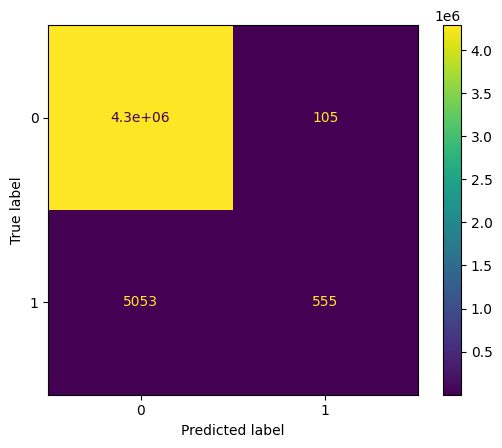

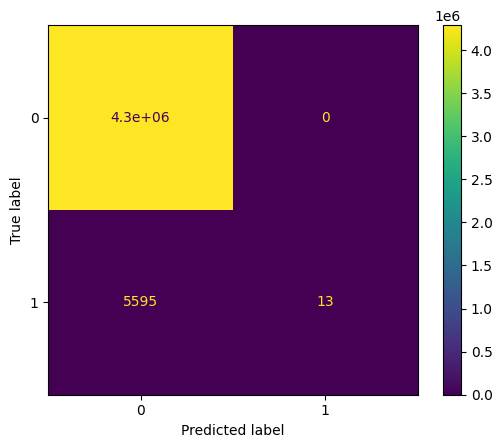

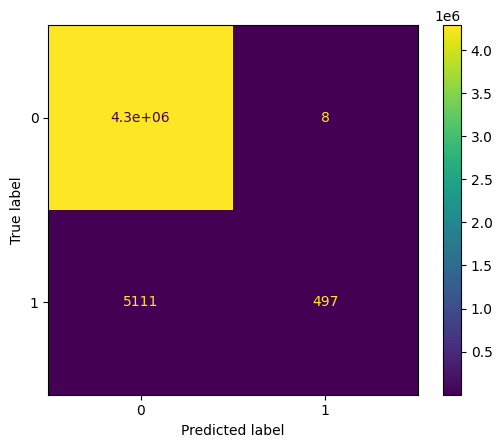

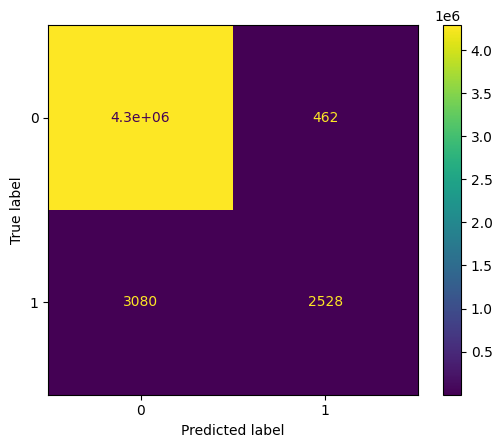

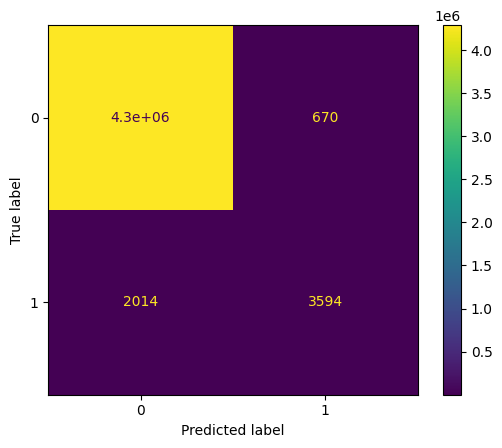

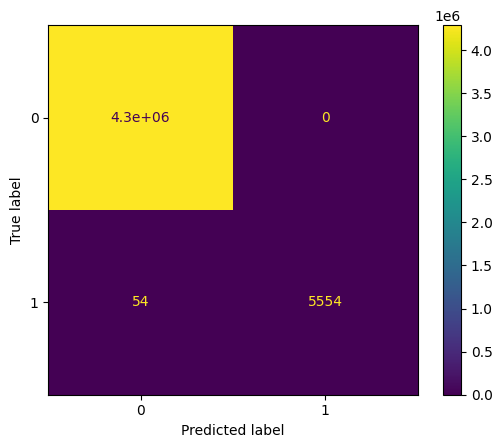

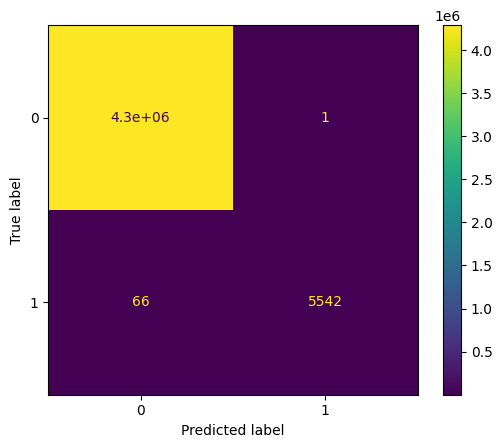

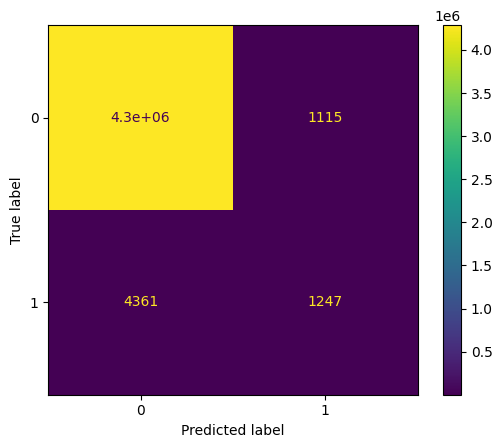

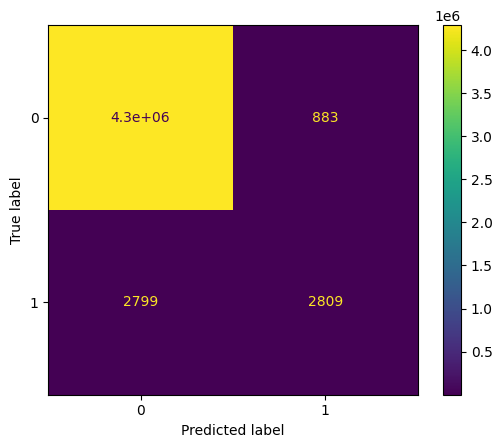

In [76]:
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(rc, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(sgd, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(svc, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(knc, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(dtc, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(rfc, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(abc, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(gbc, X_train, y_train)

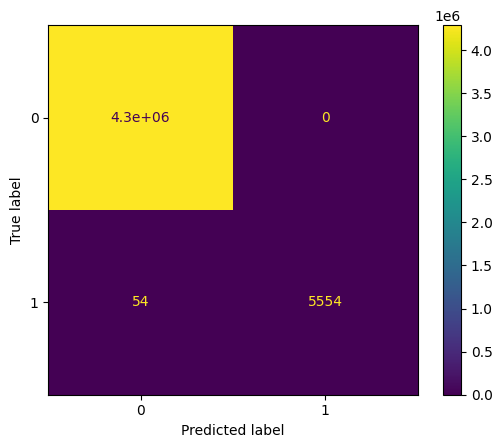

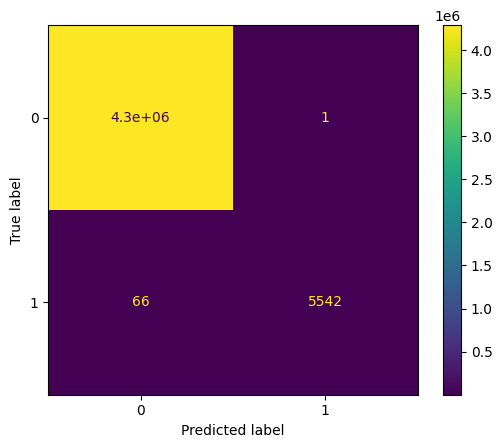

In [69]:
ConfusionMatrixDisplay.from_estimator(dtc, X_train, y_train)
ConfusionMatrixDisplay.from_estimator(rfc, X_train, y_train)

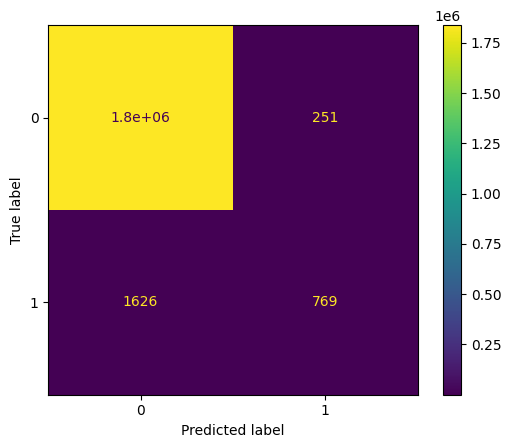

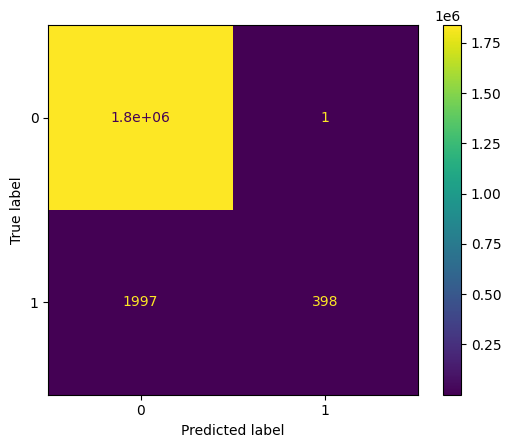

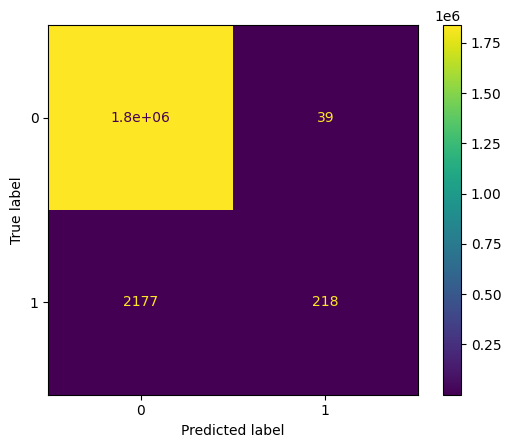

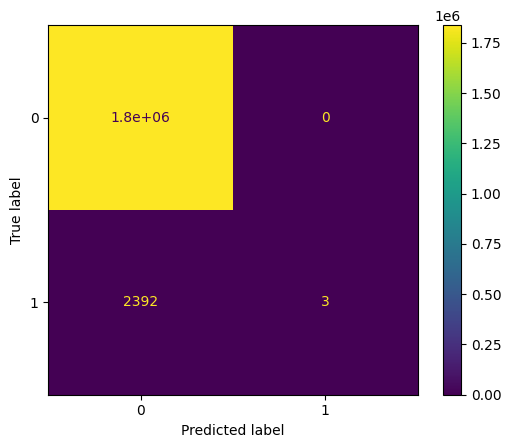

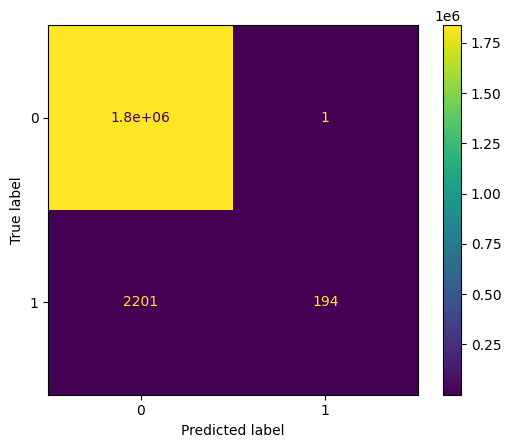

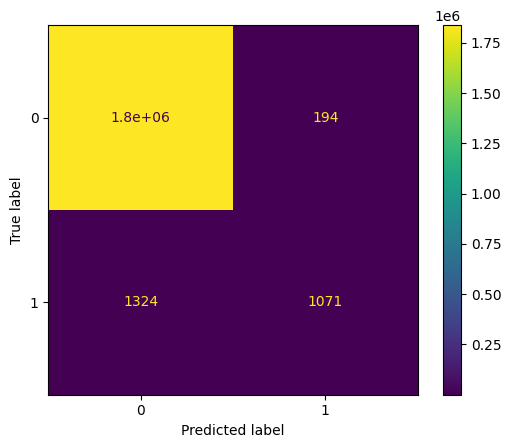

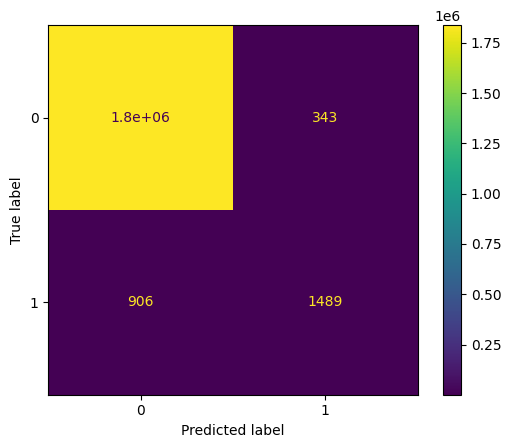

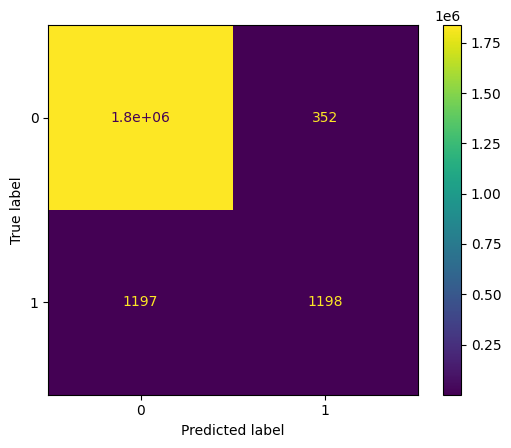

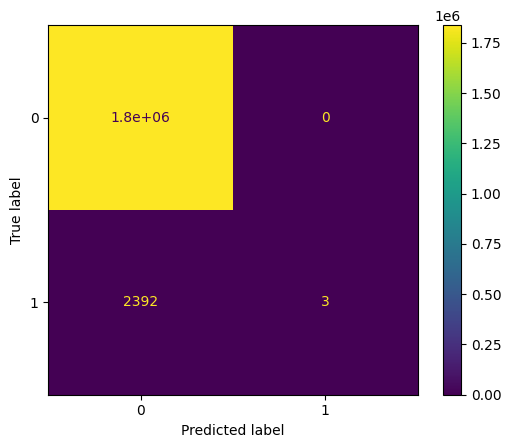

In [75]:
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(rc, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(sgd, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(knc, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(gbc, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(abc, X_test, y_test)

In [82]:
y_pred = knc.predict(X_test)

In [81]:
from sklearn.metrics import f1_score, precision_score

In [83]:
f1_score(y_test, y_pred)

0.704518571090608

In [84]:
precision_score(y_test, y_pred)

0.8127729257641921

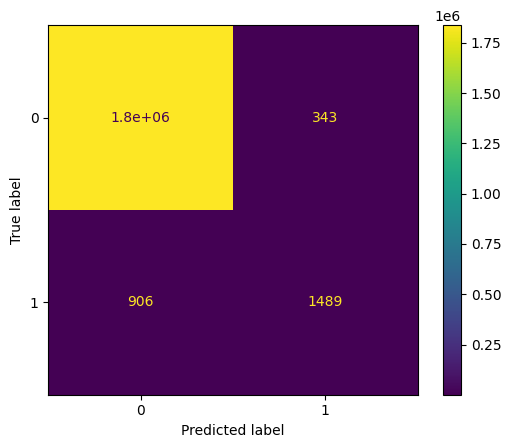

In [85]:
ConfusionMatrixDisplay.from_estimator(knc,X_test, y_test)